In [45]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [46]:
#pip install seaborn

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Estimación de Métricas de Dependencia

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye una serie de tiempo real. El dataset importado incluye cuatro series de tiempo de la ciudad de Delhi, India, desde el 1 de enero de 2013 al 1 de enero de 2017 en muestreos diarios. Las series de tiempo incluidas son:

- __meantemp__: Temperatura promedio del día.
- __humidity__: Humedad promedio del día.
- __wind_speed__: Velocidad promedio del viento en el día.
- __meanpressure__: Presión promedio del día.

Este conjunto de datos no contiene datos nulos, por lo que no es necesario realizar una imputación dedatos.

In [48]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["date"] = pd.to_datetime(df["date"])
df.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


## Asignación 1 &#x1F625;

Grafique las series de tiempo __meantemp__, __humidty__ y __wind_speed__.

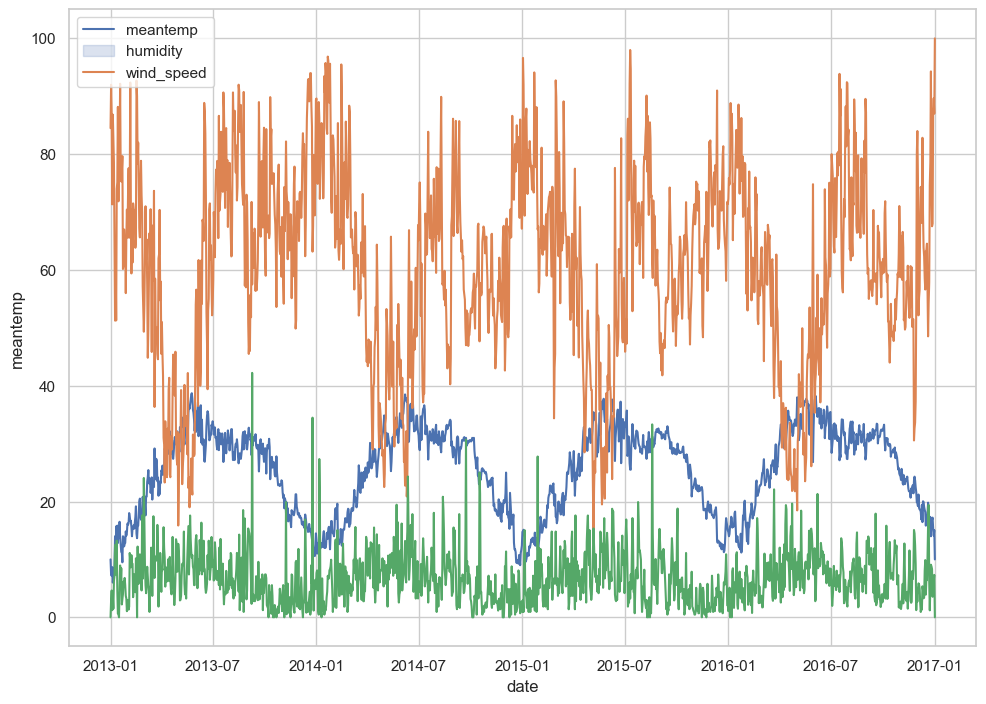

In [49]:
#graficar  meantemp, humidity y wind_speed 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.lineplot(x="date", y="meantemp", data=df)
sns.lineplot(x="date", y="humidity", data=df)
sns.lineplot(x="date", y="wind_speed", data=df)
plt.legend(labels=['meantemp', 'humidity', 'wind_speed'])
plt.show()

## Asignación 2 &#x1F625;

Grafique el histograma, calcule la media, imprimala y grafíquela en el histograma para las series de tiempo __meantemp__, __humidty__ y __wind_speed__.

/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_14433/186078084.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["meantemp"], hist=True, kde=False,
/var/folders/zb/0l4s85s95rzbg13c3_fm6k540000gn/T/ipykernel_14433/186078084.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["

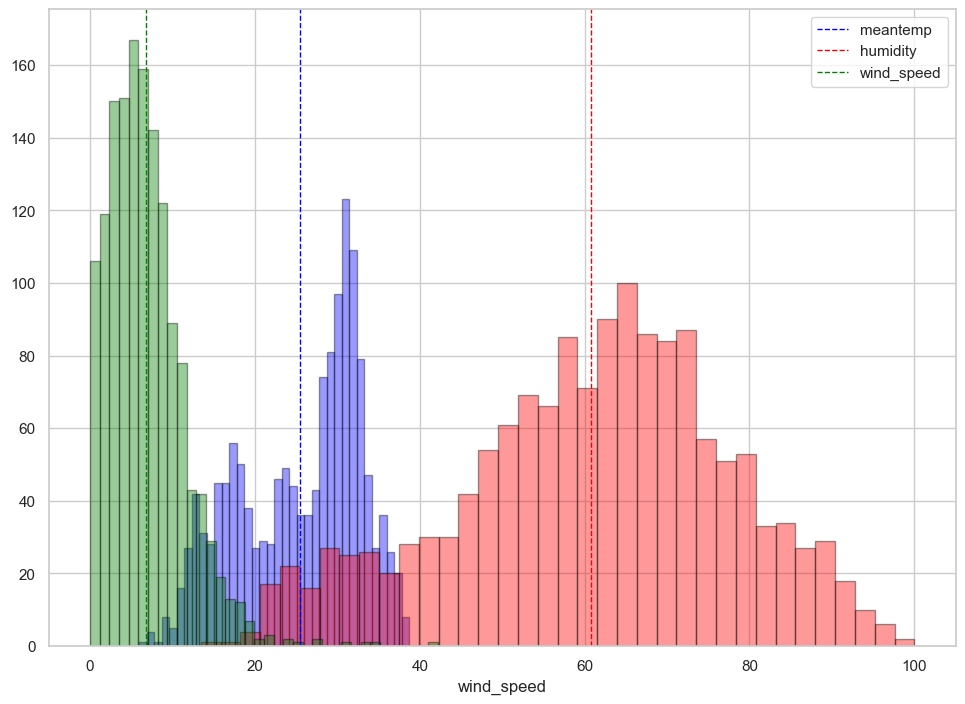

In [50]:
#graficar el histograma de meantemp , humidity y wind_speed con la media
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.distplot(df["meantemp"], hist=True, kde=False,
                bins=int(180/5), color = 'blue',
                hist_kws={'edgecolor':'black'})
sns.distplot(df["humidity"], hist=True, kde=False,
                bins=int(180/5), color = 'red',
                hist_kws={'edgecolor':'black'})
sns.distplot(df["wind_speed"], hist=True, kde=False,
                bins=int(180/5), color = 'green',
                hist_kws={'edgecolor':'black'})
plt.axvline(df["meantemp"].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(df["humidity"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df["wind_speed"].mean(), color='green', linestyle='dashed', linewidth=1)
plt.legend(labels=['meantemp', 'humidity', 'wind_speed'])
plt.show()

## Asignación 3 &#x1F625;

Implemente las función de crossvariance descrita debajo

In [51]:
def crossvariance(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la autocovarianza.
    
    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para los cuales debe calcularse la covarianza.
            
    Salidas:
    - Si lags es un número debe regresar un valor de covarianza, si es una lista, 
        debe ser una lista de covarianzas.
    """
    
    covariances = list()
    
    
    # Comprobamos si lags en entero de ser asi lo convertimos a lista
    if isinstance(lags, int):
        lags = [lags]
    
    # Empezamos a calcular la crosscovarianze
    for lag in lags:
        # Obtenemos el las series de tiempo con el desplazamiento de lag
        aux_ts2 = time_series_2.shift(periods=lag)
        aux_ts1 = time_series_1

        # mean_ts1 = np.sum(time_series_1) / len(time_series_1)
        # mean_ts2 = np.sum(aux_ts2) / len(aux_ts2)
        # mean_ts1 = np.mean(time_series_1)
        # mean_ts2 = np.mean(aux_ts2)
        
        value = np.mean((time_series_1 - np.mean(time_series_1)) * (time_series_2.shift(periods=lag) - np.mean(time_series_2.shift(periods=lag)))) #/ len(aux_ts2) 
        covariances.append(np.round(value, 8))       
        # covariances.append(np.round(np.mean(( (aux_ts1 - mean_ts1) * (aux_ts2 - mean_ts2) )), decimals =8))
        
    if len(covariances) == 1:
        # return covariances[0]
        return None
    else:
        print(covariances)
        # return covariances
        return None



In [52]:
for __ts__ in ["meantemp", "humidity", "wind_speed"]:
    __cvars__ = crossvariance(df[__ts__], df[__ts__], 0)
    
   
    if __cvars__ is not None:
        assert np.isclose(__cvars__, df[__ts__].var(ddof=0)), "Your function has an error 1"

__cvars__ = crossvariance(df["humidity"], df["wind_speed"], np.arange(5).tolist())
__expected_cvars__ = [-28.58795012, -24.37189775, -21.10904889, -19.62116432, -17.42504231] 

print(__cvars__)
if __cvars__ is not None:
    assert np.allclose(__cvars__, __expected_cvars__), "Your function has an error 2"

[-28.58795012, -24.37182213, -21.10888699, -19.62090441, -17.42471356]
None


## Asignación 4 &#x1F921;

Implemente las función de crosscorrelation.

In [53]:
def crosscorrelation(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la correlación. Usted debe definirla y documentarla como en
    el caso de la función crosscovariance. 

    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para los cuales debe calcularse la covarianza.

    Salidas:
    - Si lags es un número debe regresar un valor de covarianza, si es una lista, 
        debe ser una lista de covarianzas.
    """

    if isinstance(lags, int):
        lags = [lags]
    std_1 = time_series_1.std(ddof=0)
    std_2 = time_series_2.std(ddof=0)

    correlations = []
    for lag in lags:
        if lag == 0:
            correlation = ((time_series_1) * (time_series_2)).mean() / (std_1 * std_2)
        else:
            correlation = ((time_series_1.shift(lag)) * (time_series_2)).mean() / (std_1 * std_2)
        correlations.append(correlation)

    if len(correlations) == 1:
        return correlations[0]
    else:
        return correlations
    
        


## Asignación 5 &#x1F643;

Grafique el correlograma de la autocorrelación de la serie de tiempo __wind_speed__ junto con las lineas representativas de 2, 2.5 y 3 veces la desviación estándar (valores de correlaciones de interés).

In [ ]:
def crosscorrelation(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la correlación. Usted debe definirla y documentarla como en
    el caso de la función crosscovariance. 

    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para los cuales debe calcularse la covarianza.

    Salidas:
    - Si lags es un número debe regresar un valor de covarianza, si es una lista, 
        debe ser una lista de covarianzas.
    """

    if isinstance(lags, int):
        lags = [lags]
    std_1 = time_series_1.std(ddof=0)
    std_2 = time_series_2.std(ddof=0)

    correlations = []
    for lag in lags:
        if lag == 0:
            correlation = ((time_series_1) * (time_series_2)).mean() / (std_1 * std_2)
        else:
            correlation = ((time_series_1.shift(lag)) * (time_series_2)).mean() / (std_1 * std_2)
        correlations.append(correlation)

    if len(correlations) == 1:
        return correlations[0]
    else:
        return correlations
    
        
# utilizando la funcion crosscorrelation , graficar la autocorrelacion de la serie de tiempo "wind_speed" junto con las lineas representativas de 2,2.5 y 3 desviaciones estandar.

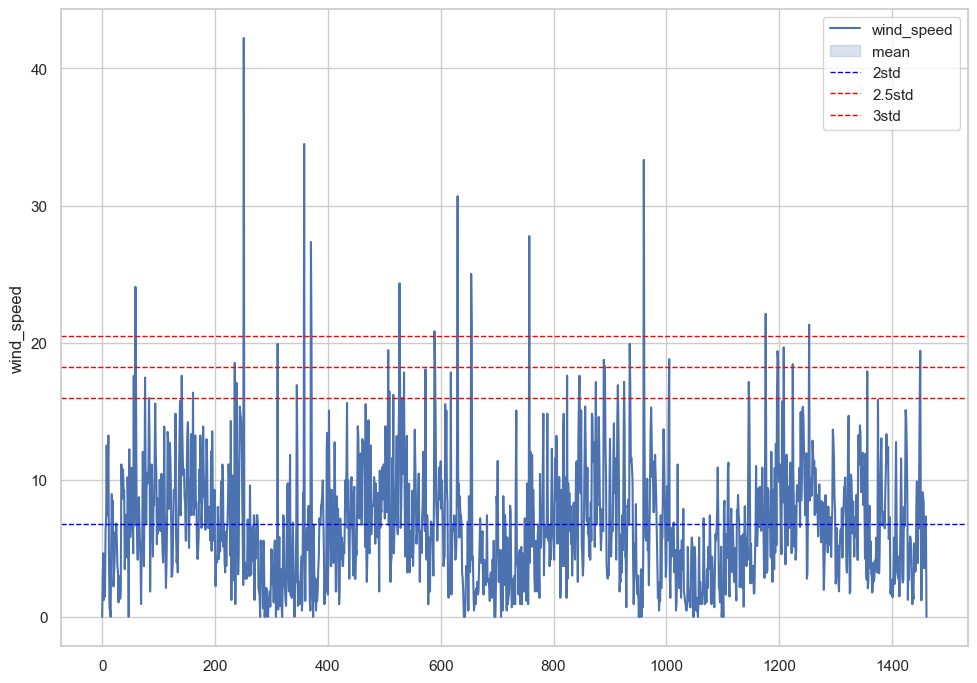

In [59]:
#plot de el correlograma de la autocrrelacion de  la serie de tiempo wind_speed junto con las lineas representativas de 2,2.5 y 3 veces la desviacion estandar 

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.lineplot(data=df["wind_speed"], label="wind_speed")
plt.axhline(df["wind_speed"].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axhline(df["wind_speed"].mean() + 2*df["wind_speed"].std(), color='red', linestyle='dashed', linewidth=1)
plt.axhline(df["wind_speed"].mean() + 2.5*df["wind_speed"].std(), color='red', linestyle='dashed', linewidth=1)
plt.axhline(df["wind_speed"].mean() + 3*df["wind_speed"].std(), color='red', linestyle='dashed', linewidth=1)
plt.legend(labels=['wind_speed', 'mean', '2std', '2.5std', '3std'])
plt.show()

## Asignación 6 &#x1F643;

Grafique el correlograma de la correlación cruzada de la serie de tiempo __wind_speed__ y __humidity__ junto con las lineas representativas de 2, 2.5 y 3 veces la desviación estándar (valores de correlación de interés).

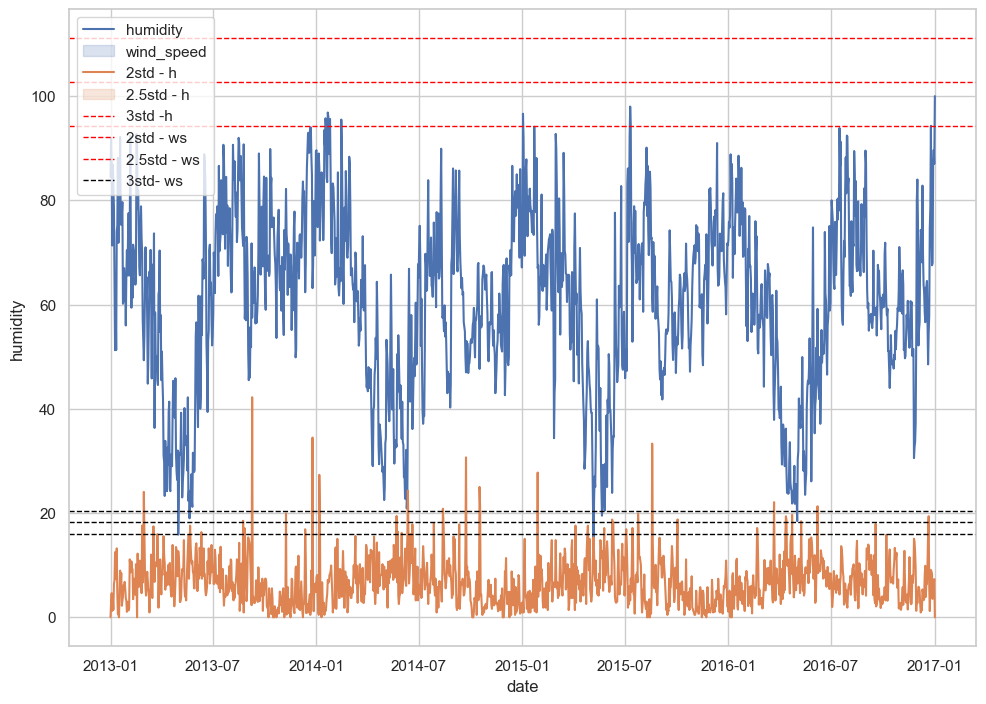

In [63]:
#graficar el correlograma de la correlación cruzada de  humidity y wind_speed junto con las lineas representativas de 2,2.5 y 3 veces la desviaciones estandar

sns.set_style("whitegrid")
sns.lineplot(x="date", y="humidity", data=df)
sns.lineplot(x="date", y="wind_speed", data=df)

plt.axhline(df["humidity"].mean() + 2*df["humidity"].std(), color='red', linestyle='dashed', linewidth=1)
plt.axhline(df["humidity"].mean() + 2.5*df["humidity"].std(), color='red', linestyle='dashed', linewidth=1)
plt.axhline(df["humidity"].mean() + 3*df["humidity"].std(), color='red', linestyle='dashed', linewidth=1)


plt.axhline(df["wind_speed"].mean() + 2*df["wind_speed"].std(), color='black', linestyle='dashed', linewidth=1)
plt.axhline(df["wind_speed"].mean() + 2.5*df["wind_speed"].std(), color='black', linestyle='dashed', linewidth=1)
plt.axhline(df["wind_speed"].mean() + 3*df["wind_speed"].std(), color='black', linestyle='dashed', linewidth=1)

plt.legend(labels=['humidity', 'wind_speed','2std - h', '2.5std - h', '3std -h', '2std - ws', '2.5std - ws', '3std- ws'])
plt.show()


## Integrity Tests

In [ ]:
import hashlib

cell_signs = [
    "2712a947826c1befb6f7d33042a804acdb7d0147"
]

for content in _ih:
    content_sign = str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest())
    if content_sign == cell_signs[0]:
        cell_signs.pop(0)
        if len(cell_signs) == 0:
            break
        
if len(cell_signs) > 0:
    print("Something was modified...")
    for cell_sign in cell_signs:
        print(cell_sign)

In [ ]:
content = _ih[-2]

program_sign = "a7f40589e9186b4b79fc2f76f1d73f2d40da0d81"
if str(hashlib.sha1(content.strip().encode("utf-8")).hexdigest()) == program_sign:
    print("Everything is consistent :)")

Everything is consistent :)
